# Componente como Serviço

## Passo 2 - Componente a partir do Workflow

In [1]:
import iplantuml

Writing output for /home/santanche/git/component2learn/notebooks/ai/8e4ff04a-654c-4c8a-a64a-604e6c4caf81.uml to 8e4ff04a-654c-4c8a-a64a-604e6c4caf81.svg


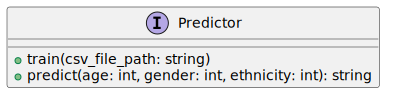

In [2]:
%%plantuml

@startuml

interface Predictor {
  + train(csv_file_path: string)
  + predict(age: int, gender: int, ethnicity: int): string
}

@enduml

Writing output for /home/santanche/git/component2learn/notebooks/ai/74041eb9-e92c-43c1-8767-230c8af8b87e.uml to 74041eb9-e92c-43c1-8767-230c8af8b87e.svg


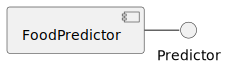

In [3]:
%%plantuml

@startuml

[FoodPredictor] - Predictor

@enduml

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

class FoodPredictor:
    def __init__(self):
        self.model = LogisticRegression()
        self.le_gender = LabelEncoder()
        self.le_ethnicity = LabelEncoder()
        self.le_fcid = LabelEncoder()

    def train(self, csv_file_path):
        # Load the data
        data = pd.read_csv(csv_file_path)

        # Encode categorical variables
        data['gender'] = self.le_gender.fit_transform(data['gender'])
        data['ethnicity'] = self.le_ethnicity.fit_transform(data['ethnicity'])
        data['fcid_code'] = self.le_fcid.fit_transform(data['fcid_code'])

        # Split features and target
        X = data[['age', 'gender', 'ethnicity']]
        y = data['fcid_code']

        # Split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train the model
        self.model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = self.model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Model accuracy: {accuracy:.2f}")

    def predict(self, age, gender, ethnicity):
        # Encode input data
        gender_encoded = self.le_gender.transform([gender])[0]
        ethnicity_encoded = self.le_ethnicity.transform([ethnicity])[0]

        # Make prediction
        prediction = self.model.predict([[age, gender_encoded, ethnicity_encoded]])

        # Decode prediction
        fcid_code = self.le_fcid.inverse_transform(prediction)[0]

        return fcid_code

In [5]:
# Create an instance of the predictor
predictor = FoodPredictor()

# Train the model
# Note: Make sure the file "intake-person-demo(beans).csv" is in the correct directory
predictor.train("intake-person-demo(beans).csv")

# Now, let's make a prediction with the given parameters
age = 31
gender = 1  # Assuming 1 represents a specific gender in your encoding
ethnicity = 2  # Assuming 2 represents a specific ethnicity in your encoding

# Make the prediction
predicted_fcid = predictor.predict(age, gender, ethnicity)

# Print the result
print(f"For a person with age {age}, gender code {gender}, and ethnicity code {ethnicity}:")
print(f"The predicted FCID code is: {predicted_fcid}")

Model accuracy: 0.61
For a person with age 31, gender code 1, and ethnicity code 2:
The predicted FCID code is: 603182000


/home/santanche/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/santanche/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
